In [2]:
import matplotlib.pyplot as plt
import seaborn as sb

import pandas as pd
import numpy as np

In [3]:
#opening json file
df_b = pd.read_json('yelp_academic_dataset_business.json', lines=True)

In [4]:
df_b

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
0,6iYb2HFDywm3zjuRg0shjw,Oskar Blues Taproom,921 Pearl St,Boulder,CO,80302,40.017544,-105.283348,4.0,86,1,"{'RestaurantsTableService': 'True', 'WiFi': 'u...","Gastropubs, Food, Beer Gardens, Restaurants, B...","{'Monday': '11:0-23:0', 'Tuesday': '11:0-23:0'..."
1,tCbdrRPZA0oiIYSmHG3J0w,Flying Elephants at PDX,7000 NE Airport Way,Portland,OR,97218,45.588906,-122.593331,4.0,126,1,"{'RestaurantsTakeOut': 'True', 'RestaurantsAtt...","Salad, Soup, Sandwiches, Delis, Restaurants, C...","{'Monday': '5:0-18:0', 'Tuesday': '5:0-17:0', ..."
2,bvN78flM8NLprQ1a1y5dRg,The Reclaimory,4720 Hawthorne Ave,Portland,OR,97214,45.511907,-122.613693,4.5,13,1,"{'BusinessAcceptsCreditCards': 'True', 'Restau...","Antiques, Fashion, Used, Vintage & Consignment...","{'Thursday': '11:0-18:0', 'Friday': '11:0-18:0..."
3,oaepsyvc0J17qwi8cfrOWg,Great Clips,2566 Enterprise Rd,Orange City,FL,32763,28.914482,-81.295979,3.0,8,1,"{'RestaurantsPriceRange2': '1', 'BusinessAccep...","Beauty & Spas, Hair Salons",None
4,PE9uqAjdw0E4-8mjGl3wVA,Crossfit Terminus,1046 Memorial Dr SE,Atlanta,GA,30316,33.747027,-84.353424,4.0,14,1,"{'GoodForKids': 'False', 'BusinessParking': '{...","Gyms, Active Life, Interval Training Gyms, Fit...","{'Monday': '16:0-19:0', 'Tuesday': '16:0-19:0'..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
160580,D2mHoIDXx9N8mS1pGoKV9Q,Eleven Oaks Realty,,Austin,TX,78701,30.272921,-97.744386,4.0,8,1,None,"Real Estate, Real Estate Services, Home Servic...","{'Monday': '9:0-19:0', 'Tuesday': '9:0-19:0', ..."
160581,bQX-kwVTyZgcdZGEPzce6Q,Webb's Honey,21777 State Rd 520,Orlando,FL,32833,28.499836,-81.047478,4.5,18,1,"{'RestaurantsTakeOut': 'True', 'RestaurantsPri...","Health Markets, Food, Specialty Food, Grocery","{'Monday': '10:0-18:0', 'Tuesday': '10:0-18:0'..."
160582,wvFZ06nmPmQ2-IVoPqVYLA,Painting with a Twist,2164 S Chickasaw Trl,Orlando,FL,32825,28.511615,-81.270020,5.0,8,0,"{'DogsAllowed': 'False', 'ByAppointmentOnly': ...","Arts & Entertainment, Paint & Sip, Art Classes...","{'Monday': '0:0-0:0', 'Wednesday': '12:0-17:0'..."
160583,GB75wPibj3IjNauaoCxyGA,Havana Cafe,910 NW 14th St,Portland,OR,97209,45.529647,-122.685153,4.0,10,1,"{'RestaurantsTakeOut': 'True', 'RestaurantsDel...","Cuban, Sandwiches, Restaurants, Cafes",None


In [5]:
#we want to study only restaurants and bars so we drop all the other activities
df_b.dropna( axis=0, how="any", thresh=None, subset=None, inplace=True)
df_activities=df_b[df_b.categories.str.contains("Restaurants", na=False)==True]

It could be interesting to study how the average ratings changes in different cities. First of all, for a meaningful analysis we will remove the closed restaurants.

In [6]:
df_activities = df_activities[df_activities.is_open==1]

In [7]:
df_activities

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
0,6iYb2HFDywm3zjuRg0shjw,Oskar Blues Taproom,921 Pearl St,Boulder,CO,80302,40.017544,-105.283348,4.0,86,1,"{'RestaurantsTableService': 'True', 'WiFi': 'u...","Gastropubs, Food, Beer Gardens, Restaurants, B...","{'Monday': '11:0-23:0', 'Tuesday': '11:0-23:0'..."
1,tCbdrRPZA0oiIYSmHG3J0w,Flying Elephants at PDX,7000 NE Airport Way,Portland,OR,97218,45.588906,-122.593331,4.0,126,1,"{'RestaurantsTakeOut': 'True', 'RestaurantsAtt...","Salad, Soup, Sandwiches, Delis, Restaurants, C...","{'Monday': '5:0-18:0', 'Tuesday': '5:0-17:0', ..."
5,D4JtQNTI4X3KcbzacDJsMw,Bob Likes Thai Food,3755 Main St,Vancouver,BC,V5V,49.251342,-123.101333,3.5,169,1,"{'GoodForKids': 'True', 'Alcohol': 'u'none'', ...","Restaurants, Thai","{'Monday': '17:0-21:0', 'Tuesday': '17:0-21:0'..."
12,HPA_qyMEddpAEtFof02ixg,Mr G's Pizza & Subs,474 Lowell St,Peabody,MA,01960,42.541155,-70.973438,4.0,39,1,"{'RestaurantsGoodForGroups': 'True', 'HasTV': ...","Food, Pizza, Restaurants","{'Monday': '11:0-21:0', 'Tuesday': '11:0-21:0'..."
13,ufCxltuh56FF4-ZFZ6cVhg,Sister Honey's,247 E Michigan St,Orlando,FL,32806,28.513265,-81.374707,4.5,135,1,"{'BusinessParking': '{'garage': False, 'street...","Restaurants, American (New), Bakeries, Dessert...","{'Tuesday': '11:0-18:0', 'Wednesday': '11:0-18..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
160562,cgNDiWCaSlqqxx1A6r65bA,Hop N Cork,17450 Lower Boones Ferry Rd,Lake Oswego,OR,97035,45.399154,-122.737600,4.0,137,1,"{'RestaurantsTakeOut': 'True', 'RestaurantsAtt...","Nightlife, Wine Bars, Beer Bar, Bars, Restaura...","{'Monday': '0:0-0:0', 'Tuesday': '16:0-20:0', ..."
160563,yQL8SrSETbbCI1U5esVJQw,Ciao! Pizza & Pasta,59 Williams St,Chelsea,MA,02150,42.389221,-71.040882,5.0,733,1,"{'GoodForKids': 'True', 'RestaurantsPriceRange...","Restaurants, Pizza, Italian","{'Monday': '0:0-0:0', 'Tuesday': '11:0-21:0', ..."
160572,r5Uag1JqYjr2nbxQCVqm8A,Saigon Noodle & Grill,101 N Bumby Ave,Orlando,FL,32803,28.544430,-81.351606,4.5,437,1,"{'Alcohol': 'u'beer_and_wine'', 'RestaurantsAt...","Restaurants, Noodles, Salad, Vietnamese, Veget...","{'Monday': '0:0-0:0', 'Tuesday': '10:30-21:30'..."
160574,Q78fYV6B6P6GmX07YVgi4g,Maudie’s Hill Country,12506 Shops Pkwy,Bee Cave,TX,78738,30.304761,-97.937394,3.0,310,1,"{'BusinessParking': '{'garage': False, 'street...","Mexican, Bars, Nightlife, Tex-Mex, Restaurants","{'Monday': '0:0-0:0', 'Tuesday': '9:0-21:0', '..."


Now, we group by city and we look for the average of the stars.

In [8]:
df_activities.groupby(by='city').mean('stars').drop(columns=['latitude', 'longitude', 'is_open', 'review_count']).sort_values(by = 'stars', ascending=False)

,stars
city,
portland,5.0
columbus,5.0
Northeast Orlando,5.0
Winter park,5.0
Union Park,5.0
...,...
Sheridan,1.5
Englewood,1.5
E.Point,1.5


As we can see, there are a lot of cities with the average stars=5, but how many of them have just a few reviews ?

Now, we will look at how many reviews each city has in order to decide how to select a meaningful thereshold and consider only the cities such that the review count is bigger than the threshold.

In [9]:
df_rev = df_activities.groupby(by='city').count().drop(columns= ['business_id', 'name', 'address', 'state', 'postal_code', 'latitude', 'longitude', 'stars',
                                                       'is_open', 'attributes', 'categories', 'hours'])

Now that we have for each city the review count we can ask ourself: what is the mean of the review count ?

In [10]:
df_rev.mean()

review_count    72.551899
dtype: float64

What are the maximum and the minimum of the review count ?

In [11]:
print('the maximum is: ', df_rev.max())

the maximum is:  review_count    2842
dtype: int64


In [12]:
print('the minimum is:', df_rev.min())

the minimum is: review_count    1
dtype: int64


What about the median ?

In [13]:
print('the median is: ', df_rev.median())

the median is:  review_count    8.0
dtype: float64


The median is a very important value. It allows us to notice that the percentage of review counts smaller or equal than 8 is 50%. This mean that the number of reviews in different cities is small in general. To have a better understanding we can plot the distribution.

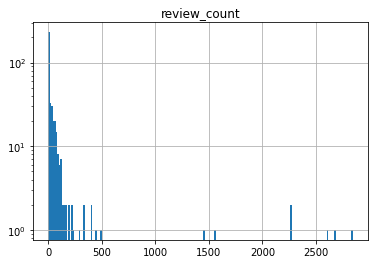

In [14]:
df_rev.hist(bins=200, log=True)
plt.show()

As we can see, the distribution is very left-skewed, it means that the majority of the cities has a very few reviews. We will then consider simply cities with more than 100 reviews to have a meaningful analysis.

In [15]:
df_rev = df_rev[df_rev['review_count']>100]

In [16]:
df_rev

,review_count
city,
Altamonte Springs,142
Atlanta,2263
Austin,2601
Beaverton,338
Boston,1464
Boulder,341
Brookline,123
Burnaby,400
Cambridge,404


In [17]:
df_rev.shape

(38, 1)

As we can see, we have removed a lot of cities. Just 38/350 cities remain there.

In [18]:
list_cities = df_rev.index.tolist()

In [19]:
list_cities

['Altamonte Springs',
 'Atlanta',
 'Austin',
 'Beaverton',
 'Boston',
 'Boulder',
 'Brookline',
 'Burnaby',
 'Cambridge',
 'Clermont',
 'Columbus',
 'Coquitlam',
 'Decatur',
 'Dublin',
 'Hilliard',
 'Kissimmee',
 'Lake Mary',
 'Lake Oswego',
 'New Westminster',
 'Newton',
 'North Vancouver',
 'Orlando',
 'Oviedo',
 'Portland',
 'Quincy',
 'Richmond',
 'Salem',
 'Sanford',
 'Smyrna',
 'Somerville',
 'Surrey',
 'Tigard',
 'Tucker',
 'Vancouver',
 'Waltham',
 'Westerville',
 'Winter Garden',
 'Winter Park']

We select from the dataframe of the restaurants, the ones whose city is in the list above.

In [20]:
df_activities = df_activities[df_activities['city'].isin(list_cities)]

We will print the ten cities with the highest number of average stars for restaurants

In [21]:
df_to_visualize = df_activities.groupby(by='city').mean('stars').sort_values('stars', ascending=False).drop(columns= ['latitude', 'longitude', 'is_open', 'review_count'])[0:10]
df_to_visualize

,stars
city,
Portland,3.890570
Winter Park,3.848624
Somerville,3.829694
Brookline,3.768293
Boulder,3.749267
Lake Oswego,3.735294
Austin,3.727028
Cambridge,3.702970
Salem,3.683333


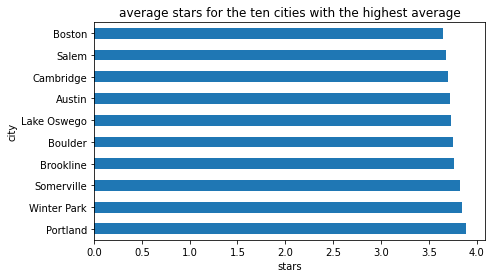

In [22]:
plt.rcParams["figure.figsize"] = (7,4)
ax = df_to_visualize.plot(kind = 'barh')
ax.get_legend().remove()
plt.title('average stars for the ten cities with the highest average')
plt.xlabel('stars')
plt.show()

As we can notice, the city with the highest average star is Portland with an average of 3.89 stars

Are all these cities close to each other or are they far from each other ?

In [23]:
df_activities

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
0,6iYb2HFDywm3zjuRg0shjw,Oskar Blues Taproom,921 Pearl St,Boulder,CO,80302,40.017544,-105.283348,4.0,86,1,"{'RestaurantsTableService': 'True', 'WiFi': 'u...","Gastropubs, Food, Beer Gardens, Restaurants, B...","{'Monday': '11:0-23:0', 'Tuesday': '11:0-23:0'..."
1,tCbdrRPZA0oiIYSmHG3J0w,Flying Elephants at PDX,7000 NE Airport Way,Portland,OR,97218,45.588906,-122.593331,4.0,126,1,"{'RestaurantsTakeOut': 'True', 'RestaurantsAtt...","Salad, Soup, Sandwiches, Delis, Restaurants, C...","{'Monday': '5:0-18:0', 'Tuesday': '5:0-17:0', ..."
5,D4JtQNTI4X3KcbzacDJsMw,Bob Likes Thai Food,3755 Main St,Vancouver,BC,V5V,49.251342,-123.101333,3.5,169,1,"{'GoodForKids': 'True', 'Alcohol': 'u'none'', ...","Restaurants, Thai","{'Monday': '17:0-21:0', 'Tuesday': '17:0-21:0'..."
13,ufCxltuh56FF4-ZFZ6cVhg,Sister Honey's,247 E Michigan St,Orlando,FL,32806,28.513265,-81.374707,4.5,135,1,"{'BusinessParking': '{'garage': False, 'street...","Restaurants, American (New), Bakeries, Dessert...","{'Tuesday': '11:0-18:0', 'Wednesday': '11:0-18..."
16,GfWJ19Js7wX9rwaHQ7KbGw,Everything POP Shopping & Dining,1050 Century Dr,Orlando,FL,32830,28.350498,-81.542819,3.0,7,1,"{'HasTV': 'False', 'Caters': 'False', 'Busines...","Restaurants, American (New), Food Court, Flowe...","{'Monday': '0:0-0:0', 'Tuesday': '7:0-22:0', '..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
160556,87f7kR7nTz8WHnmtLM_S6w,O Ya,9 East St Pl,Boston,MA,02111,42.351408,-71.056867,4.5,737,1,"{'RestaurantsPriceRange2': '4', 'RestaurantsGo...","Japanese, Sushi Bars, Restaurants","{'Monday': '0:0-0:0', 'Tuesday': '17:0-21:30',..."
160561,jYgqSazE0gUyI7qq086Dzw,Chart House,5700 SW Terwilliger,Portland,OR,97239,45.483154,-122.682748,3.5,457,1,"{'BusinessAcceptsCreditCards': 'True', 'Outdoo...","Event Planning & Services, Steakhouses, Seafoo...","{'Tuesday': '16:0-21:0', 'Wednesday': '16:0-21..."
160562,cgNDiWCaSlqqxx1A6r65bA,Hop N Cork,17450 Lower Boones Ferry Rd,Lake Oswego,OR,97035,45.399154,-122.737600,4.0,137,1,"{'RestaurantsTakeOut': 'True', 'RestaurantsAtt...","Nightlife, Wine Bars, Beer Bar, Bars, Restaura...","{'Monday': '0:0-0:0', 'Tuesday': '16:0-20:0', ..."
160572,r5Uag1JqYjr2nbxQCVqm8A,Saigon Noodle & Grill,101 N Bumby Ave,Orlando,FL,32803,28.544430,-81.351606,4.5,437,1,"{'Alcohol': 'u'beer_and_wine'', 'RestaurantsAt...","Restaurants, Noodles, Salad, Vietnamese, Veget...","{'Monday': '0:0-0:0', 'Tuesday': '10:30-21:30'..."


In [24]:
from mpl_toolkits.basemap import Basemap

In [25]:
lat = df_activities['latitude'].values
lon = df_activities['longitude'].values
population = df_activities['review_count']

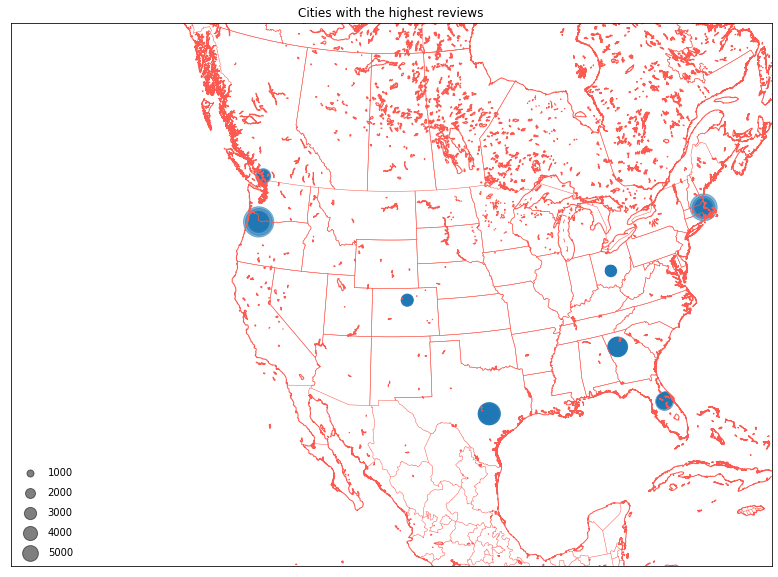

In [93]:
# 1. Draw the map background
fig = plt.figure(figsize=(20, 10))
m = Basemap(projection='lcc', resolution='h', 
            lat_0=40.5, lon_0=-107,
            width=7.0E6, height=5.0E6)
#m.shadedrelief()
m.drawcoastlines(color='xkcd:coral')
m.drawcountries(color='xkcd:coral')
m.drawstates(color='xkcd:coral')

# 2. scatter city data, with color reflecting population
# and size reflecting area
m.scatter(lon, lat, latlon=True,
          s=population/10,cmap='Reds', alpha=0.5)

# 3. create colorbar and legend
#plt.colorbar(label='Number of reviews')
#plt.clim(0,10000 )

# make legend with dummy points
for i in [50, 100, 150, 200, 250]:
    plt.scatter([], [], c='k', alpha=0.5, s=i,
                label=str(i*2*10))
plt.legend(scatterpoints=1, frameon=False,
           labelspacing=1, loc='lower left')
plt.title('Cities with the highest reviews')
plt.show()

In [29]:
list_df=[]
for i in range(1, 19):
    print(i)
    df = pd.read_csv('review'+str(i)+'.csv')
    df.drop(['text','review_id','user_id','funny','cool'], axis=1)
    list_df.append(df)
reviews = pd.concat(list_df)

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18


As we can see we can conclude that there is not a geografical association between the most liked restaurants.

In [30]:
reviews

,review_id,user_id,business_id,stars,useful,funny,cool,text,date
0,lWC-xP3rd6obsecCYsGZRg,ak0TdVmGKo4pwqdJSTLwWw,buF9druCkbuXLX526sGELQ,4,3,1,1,Apparently Prides Osteria had a rough summer a...,2014-10-11 03:34:02
1,8bFej1QE5LXp4O05qjGqXA,YoVfDbnISlW0f7abNQACIg,RA4V8pr014UyUbDvI-LW2A,4,1,0,0,This store is pretty good. Not as great as Wal...,2015-07-03 20:38:25
2,NDhkzczKjLshODbqDoNLSg,eC5evKn1TWDyHCyQAwguUw,_sS2LBIGNT5NQb6PD1Vtjw,5,0,0,0,I called WVM on the recommendation of a couple...,2013-05-28 20:38:06
3,T5fAqjjFooT4V0OeZyuk1w,SFQ1jcnGguO0LYWnbbftAA,0AzLzHfOJgL7ROwhdww2ew,2,1,1,1,I've stayed at many Marriott and Renaissance M...,2010-01-08 02:29:15
4,sjm_uUcQVxab_EeLCqsYLg,0kA0PAJ8QFMeveQWHFqz2A,8zehGz9jnxPqXtOc7KaJxA,4,0,0,0,The food is always great here. The service fro...,2011-07-28 18:05:01
...,...,...,...,...,...,...,...,...,...
135398,PHnqMOU1pzHbnUMk3Cg2zA,6olZ0y9oW9azON61AhwxYg,yyTtwwQ4JnQMJ2rn3W0S0g,1,0,0,0,"In December, I called in (as a returning custo...",2021-01-26 04:07:14
135399,dViF8gg9745CszpekNvp2g,EPYNZQFuSKqLi-on3U9dFg,RDgwjgbu5xziFIAaNn3WCQ,1,13,1,0,This guy is a moron that will stalk and harass...,2019-05-01 21:21:43
135400,7vNXRIClt-9rFzMXlrtMXA,tr13Jb83h2itjyXVwaO5eA,rbuj2X4SXIc3MDul4dcxIA,5,39,13,34,"Yummy, great chew on the bagel\nFriendly staff...",2020-06-13 02:39:26
135401,Ho57jz6U-JjrGHpGWIGLNg,HqdmRMpNvScFxjGAB40vgQ,IRzjEZ2pX4iOpnBG7oZJ7g,2,2,0,0,This used to be my car wash of choice. They di...,2020-06-22 21:54:10


In [31]:
reviews.to_pickle('reviews')

In [32]:
reviews = pd.read_pickle('reviews')

In [33]:
reviews = reviews.sample(10000)

It would be interesting to know if there is any correlation between a good rating of an activity and the dates (months/years/days)

In [34]:
#opening json file
df_b = pd.read_json('yelp_academic_dataset_business.json', lines=True)
#we want to study only restaurants and bars so we drop all the other activities
df_b.dropna( axis=0, how="any", thresh=None, subset=None, inplace=True)
df_activities=df_b[df_b.categories.str.contains("Restaurants", na=False)==True]

In [35]:
final_df = pd.merge(df_activities,reviews, right_on='business_id', left_on='business_id')

In [36]:
final_df.to_pickle('final_df_ratings_an')

In [37]:
final_df = pd.read_pickle('final_df_ratings_an')

In [38]:
final_df

,business_id,name,address,city,state,postal_code,latitude,longitude,stars_x,review_count,...,categories,hours,review_id,user_id,stars_y,useful,funny,cool,text,date
0,D4JtQNTI4X3KcbzacDJsMw,Bob Likes Thai Food,3755 Main St,Vancouver,BC,V5V,49.251342,-123.101333,3.5,169,...,"Restaurants, Thai","{'Monday': '17:0-21:0', 'Tuesday': '17:0-21:0'...",xB9gOtkej3x0DdiCiY5BnA,pdJUrJOpcNXkbjcsxtdiMg,4,1,0,1,Just an update after another visit to Bob's - ...,2010-11-21 05:20:47
1,jGennaZUr2MsJyRhijNBfA,Legal Sea Foods,1 Harborside Dr,Boston,MA,02128,42.363442,-71.025781,3.5,856,...,"Sandwiches, Food, Restaurants, Breakfast & Bru...","{'Monday': '6:0-21:0', 'Tuesday': '6:0-21:0', ...",czOLg9hBT2HyGleL5dJ_qQ,9NPKooC5kN7qmxiS7B_X5w,4,2,1,1,How many times have you ordered a scotch in th...,2011-06-11 13:59:32
2,NRPemqVb4qpWFF0Avq_6OQ,Eurasia Sushi Bar & Seafood,"7101 W Hwy 71, Ste C-13",Austin,TX,78735,30.234533,-97.877262,4.5,395,...,"Bars, Nightlife, Cocktail Bars, Seafood, Resta...","{'Monday': '0:0-0:0', 'Tuesday': '11:0-22:0', ...",wCy6QGVZSXn-IvPV_8BGfg,SOA3appKV5c_xQCUpQpoqw,2,0,0,0,I have no idea how this place has such a high ...,2019-10-15 03:45:21
3,Q2vefh0tGhtCGQDK1FI7cw,Piece of Cake,3215 Roswell Rd NE,Atlanta,GA,30305,33.842875,-84.378539,4.0,231,...,"Restaurants, Patisserie/Cake Shop, Desserts, F...","{'Monday': '0:0-0:0', 'Tuesday': '10:0-17:0', ...",soErhd23VG4p7JdRnGmMbA,isCnLZx649mpliye09C1Jw,4,0,1,0,Every Tuesday I find myself at Piece of Cake! ...,2017-06-20 20:21:41
4,jI0NfabCGtRZWH5S0jl6Pw,Sabor Latino - Puerto Rican Cuisine & Gallery,777 Deltona Blvd,Deltona,FL,32725,28.882545,-81.279028,3.5,26,...,"Caribbean, Restaurants, Puerto Rican","{'Monday': '11:0-19:0', 'Tuesday': '11:0-19:0'...",cG1bphGONQtrQGMaFHExFg,3s766IpNsRQBmpBOZqkDqg,1,0,0,0,First time there and last same as other review...,2019-06-03 19:27:10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6204,r5Uag1JqYjr2nbxQCVqm8A,Saigon Noodle & Grill,101 N Bumby Ave,Orlando,FL,32803,28.544430,-81.351606,4.5,437,...,"Restaurants, Noodles, Salad, Vietnamese, Veget...","{'Monday': '0:0-0:0', 'Tuesday': '10:30-21:30'...",pWrZc1CSyS7HrfQJj7DQYw,0Pg8Ka3T7AFEpLzzADuDXg,4,4,2,4,Although I've only lived here for a short time...,2016-10-18 18:29:02
6205,r5Uag1JqYjr2nbxQCVqm8A,Saigon Noodle & Grill,101 N Bumby Ave,Orlando,FL,32803,28.544430,-81.351606,4.5,437,...,"Restaurants, Noodles, Salad, Vietnamese, Veget...","{'Monday': '0:0-0:0', 'Tuesday': '10:30-21:30'...",7xsGzw2WwFaDrliX0mvGkw,t-MbBRkNIR0eM_Ha2dAF0w,4,0,0,0,Was finally able to give this place a try on a...,2018-02-12 20:42:44
6206,Q78fYV6B6P6GmX07YVgi4g,Maudie’s Hill Country,12506 Shops Pkwy,Bee Cave,TX,78738,30.304761,-97.937394,3.0,310,...,"Mexican, Bars, Nightlife, Tex-Mex, Restaurants","{'Monday': '0:0-0:0', 'Tuesday': '9:0-21:0', '...",FNVmWMWHNYAW9-Dp_iNP2g,N61jd4b-GZsB2HhPWy6Nfw,3,2,1,1,So this location has been good as far service ...,2015-11-20 02:41:59
6207,uXdQkuEtvLAzfc3MsO-sTQ,Mama's Cocina Latina,1958 Piedmont Rd NE,Atlanta,GA,30324,33.810996,-84.367084,3.0,185,...,"Restaurants, Mexican, Latin American","{'Monday': '0:0-0:0', 'Tuesday': '0:0-0:0', 'W...",dKCXEjZRjzSDF3Z0sKqADw,2tzAgJzPJa4M21HB6bM3bA,1,0,0,0,Plenty of parking out front (because nobody is...,2015-03-31 00:54:57


In [39]:
df_dates = final_df.drop(columns=['name', 'address', 'state', 'postal_code', 'latitude', 'longitude','stars_x', 'review_count', 'categories', 'hours', 'is_open',
                                 'attributes', 'user_id', 'useful', 'funny', 'cool', 'text', 'business_id', 'city', 'review_id'])

In [40]:
df_dates

,stars_y,date
0,4,2010-11-21 05:20:47
1,4,2011-06-11 13:59:32
2,2,2019-10-15 03:45:21
3,4,2017-06-20 20:21:41
4,1,2019-06-03 19:27:10
...,...,...
6204,4,2016-10-18 18:29:02
6205,4,2018-02-12 20:42:44
6206,3,2015-11-20 02:41:59
6207,1,2015-03-31 00:54:57


In [41]:
from datetime import datetime

In [42]:
df_dates.date = df_dates['date'].apply(lambda x : datetime.strptime(x, '%Y-%m-%d %H:%M:%S'))

In [43]:
df_dates.groupby(df_dates['date'].dt.year)["stars_y"].mean()

date
2005    3.500000
2006    3.428571
2007    3.826087
2008    3.904762
2009    3.891566
2010    3.697674
2011    3.639860
2012    3.725434
2013    3.539267
2014    3.748515
2015    3.796970
2016    3.799740
2017    3.746922
2018    3.735032
2019    3.812584
2020    3.813679
2021    4.125000
Name: stars_y, dtype: float64

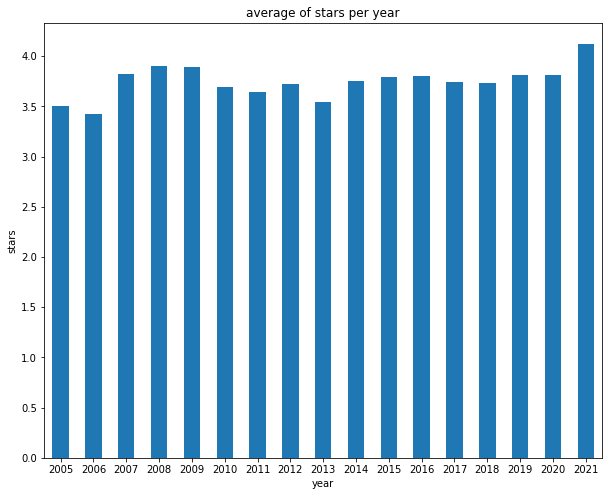

In [44]:
df_dates.groupby(df_dates['date'].dt.year)["stars_y"].mean().plot(
    kind='bar', rot=0, figsize=(10,8))
plt.ylabel('stars')
plt.xlabel('year')
plt.title('average of stars per year')
plt.show()

As we can see the year in which the reviews were more positive was 2005, is this result significant ? We add confidence intervals

In [45]:
df_dates.groupby(df_dates['date'].dt.year)["stars_y"].get_group(2005)

1067    3
1561    3
1991    4
4994    4
Name: stars_y, dtype: int64

In [46]:
def bootstrap_CI(data, nbr_draws):
    means = np.zeros(nbr_draws)
    data = np.array(data)

    for n in range(nbr_draws):
        indices = np.random.randint(0, len(data), len(data))
        data_tmp = data[indices] 
        means[n] = np.nanmean(data_tmp)

    return [np.nanpercentile(means, 2.5),np.nanpercentile(means, 97.5)]

In [47]:
lengths = []
for i in range(2005, 2022):
    data = df_dates.groupby(df_dates['date'].dt.year)["stars_y"].get_group(i).values
    lengths.append(bootstrap_CI(data, 1000)[1]-bootstrap_CI(data, 1000)[0])
print(lengths)

[1.0, 0.9285714285714288, 0.5869565217391304, 0.3809523809523805, 0.3436746987951804, 0.31174418604651155, 0.2973776223776219, 0.25433526011560703, 0.2670157068062826, 0.2297524752475244, 0.20310606060606062, 0.19118985695708668, 0.21344049247606023, 0.2051910828025476, 0.21422356091030803, 0.29251179245282977, 1.0833333333333335]


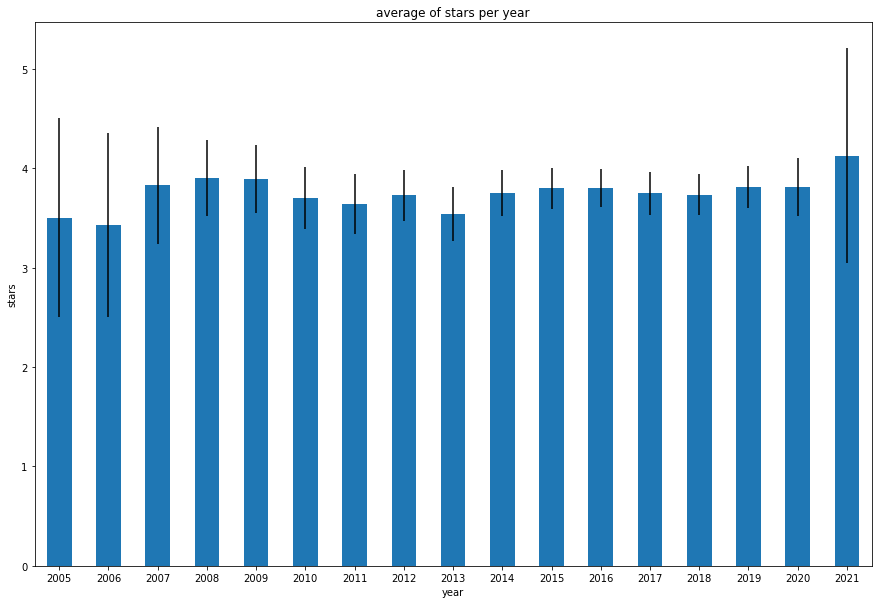

In [48]:
df_dates.groupby(df_dates['date'].dt.year)["stars_y"].mean().plot(
    kind='bar', rot=0, figsize=(15,10), yerr = lengths)
plt.ylabel('stars')
plt.xlabel('year')
plt.title('average of stars per year')
plt.show()

In [56]:
import scipy

In [108]:
def difference_means_years(years):
    year1 = df_dates.groupby(df_dates['date'].dt.year)["stars_y"].get_group(years[0]).values
    year2 = df_dates.groupby(df_dates['date'].dt.year)["stars_y"].get_group(years[1]).values
    print('the result of the T-test for the years', years, 'is')
    print(scipy.stats.ttest_ind(year1, year2))

In [58]:
for i in range(2005,2019):
    for j in range(i,2019):
        difference_means_years([i,j])

the result of the T-test for the years [2005, 2005] is
Ttest_indResult(statistic=0.0, pvalue=1.0)
the result of the T-test for the years [2005, 2006] is
Ttest_indResult(statistic=0.14294833797837303, pvalue=0.8881157205894216)
the result of the T-test for the years [2005, 2007] is
Ttest_indResult(statistic=-0.641732640354887, pvalue=0.5240996859165977)
the result of the T-test for the years [2005, 2008] is
Ttest_indResult(statistic=-0.7834523555902593, pvalue=0.43509225378298166)
the result of the T-test for the years [2005, 2009] is
Ttest_indResult(statistic=-0.6937392712203164, pvalue=0.4888038240298811)
the result of the T-test for the years [2005, 2010] is
Ttest_indResult(statistic=-0.32650328752753716, pvalue=0.7443582888538205)
the result of the T-test for the years [2005, 2011] is
Ttest_indResult(statistic=-0.2229956132559499, pvalue=0.8236969966528234)
the result of the T-test for the years [2005, 2012] is
Ttest_indResult(statistic=-0.3605660588872902, pvalue=0.7186426232196383

the result of the T-test for the years [2013, 2014] is
Ttest_indResult(statistic=-2.383061562264629, pvalue=0.017379457876154525)
the result of the T-test for the years [2013, 2015] is
Ttest_indResult(statistic=-2.9976669166292043, pvalue=0.0027851807267710253)
the result of the T-test for the years [2013, 2016] is
Ttest_indResult(statistic=-3.092720592469181, pvalue=0.0020311315527775918)
the result of the T-test for the years [2013, 2017] is
Ttest_indResult(statistic=-2.361616446386031, pvalue=0.018367250973753427)
the result of the T-test for the years [2013, 2018] is
Ttest_indResult(statistic=-2.172919654239743, pvalue=0.02998736495079355)
the result of the T-test for the years [2014, 2014] is
Ttest_indResult(statistic=0.0, pvalue=1.0)
the result of the T-test for the years [2014, 2015] is
Ttest_indResult(statistic=-0.6272027611376503, pvalue=0.5306494429448916)
the result of the T-test for the years [2014, 2016] is
Ttest_indResult(statistic=-0.6790874826795014, pvalue=0.4972059748

The t-test quantifies the difference between the arithmetic means of the two samples. The p-value quantifies the probability of observing as or more extreme values assuming the null hypothesis, that the samples are drawn from populations with the same population means, is true. A p-value larger than a chosen threshold (in this case 0.05) indicates that our observation is not so unlikely to have occurred by chance. Therefore, we do not reject the null hypothesis of equal population means.

We performed the t-test on each couple of years between 2005 and 2018 in order to discover significative differences in means between the groups. The result obtained is that there is never a significative difference between the means a part from the years 2008-2013, 2009-2011, 2009-2013, 2013-2014, 2013-2015, 2013-2016, 2013-2017, 2013-2018 (considering a confindence level of alpha=0.05)

2013 is the year with the smallest "significant" mean

We repeat the same analysis for months

In [59]:
df_dates.groupby(df_dates['date'].dt.month)["stars_y"].mean()

date
1     3.818359
2     3.805660
3     3.727273
4     3.724947
5     3.639344
6     3.865613
7     3.703901
8     3.691358
9     3.798828
10    3.809524
11    3.709419
12    3.792453
Name: stars_y, dtype: float64

In [60]:
lengths = []
for i in range(1, 13):
    data = df_dates.groupby(df_dates['date'].dt.month)["stars_y"].get_group(i).values
    lengths.append(bootstrap_CI(data, 1000)[1]-bootstrap_CI(data, 1000)[0])
print(lengths)

[0.24028320312500018, 0.21886792452830184, 0.22916666666666652, 0.2707889125799574, 0.24795081967213095, 0.24120553359683772, 0.2199024822695037, 0.23641975308642005, 0.23046875, 0.23616071428571406, 0.2505511022044087, 0.22650943396226442]


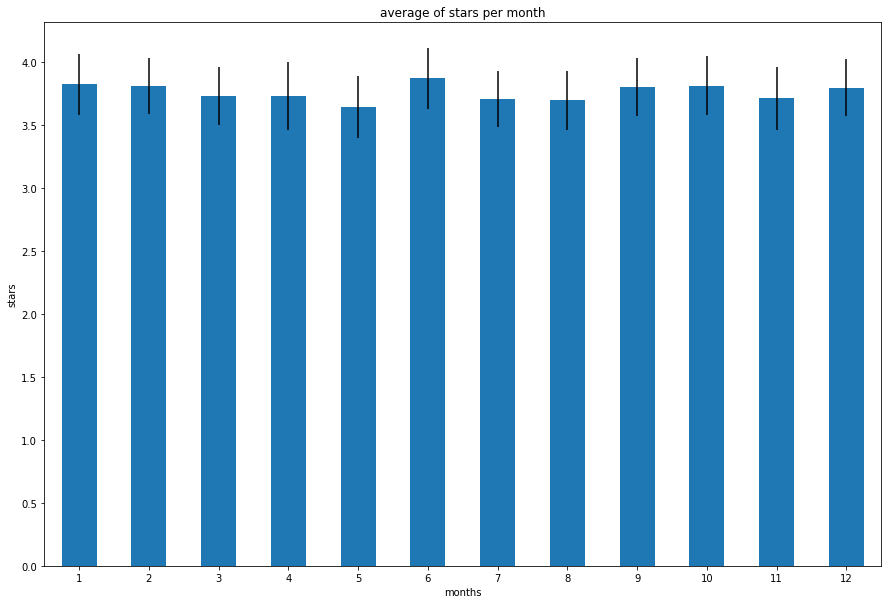

In [61]:
df_dates.groupby(df_dates['date'].dt.month)["stars_y"].mean().plot(
    kind='bar', rot=0, figsize=(15,10), yerr = lengths)
plt.ylabel('stars')
plt.xlabel('months')
plt.title('average of stars per month')
plt.show()

We make a t-test for the two months with the biggest difference in mean.

In [67]:
def difference_means_months(months):
    month1 = df_dates.groupby(df_dates['date'].dt.month)["stars_y"].get_group(months[0]).values
    month2 = df_dates.groupby(df_dates['date'].dt.month)["stars_y"].get_group(months[1]).values
    print('the result of the T-test for the months', months, 'is')
    print(scipy.stats.ttest_ind(month1, month2))

In [68]:
for i in range(1,13):
    for j in range(i,13):
        difference_means_months([i,j])

the result of the T-test for the months [1, 1] is
Ttest_indResult(statistic=0.0, pvalue=1.0)
the result of the T-test for the months [1, 2] is
Ttest_indResult(statistic=0.15262091681775075, pvalue=0.8787268329635727)
the result of the T-test for the months [1, 3] is
Ttest_indResult(statistic=1.0706707216399283, pvalue=0.28456639975835135)
the result of the T-test for the months [1, 4] is
Ttest_indResult(statistic=1.0480772971813672, pvalue=0.2948616672867341)
the result of the T-test for the months [1, 5] is
Ttest_indResult(statistic=2.0558733405309284, pvalue=0.04005440485685507)
the result of the T-test for the months [1, 6] is
Ttest_indResult(statistic=-0.5593975435026173, pvalue=0.5760137269978387)
the result of the T-test for the months [1, 7] is
Ttest_indResult(statistic=1.3666751003259785, pvalue=0.17201318894421375)
the result of the T-test for the months [1, 8] is
Ttest_indResult(statistic=1.4986009959833217, pvalue=0.1342702107993123)
the result of the T-test for the months [

As before, we look for the months in which there is a statistical difference in mean. We found that there is a significant difference for months: 1-5 (january-may), 5-6 (may-june), 6-8 (june, august) 

In some way june is the month with the highest statistically significant mean while may is the one with the lower

We could repeat the same analysis clustering the months by season.

In [69]:
summer = [6,7,8] #summer is june, july,august
autumn = [9,10,11]
spring = [3,4,5]
winter = [12,1,2]

In [70]:
column_to_add = []
for el in df_dates['date'].dt.month:
    if el in summer:
        column_to_add.append('sum')
    if el in autumn:
        column_to_add.append('aut')
    if el in spring:
        column_to_add.append('spr')
    if el in winter:
        column_to_add.append('win')
df_dates['period']=column_to_add

In [71]:
df_dates

,stars_y,date,period
0,4,2010-11-21 05:20:47,aut
1,4,2011-06-11 13:59:32,sum
2,2,2019-10-15 03:45:21,aut
3,4,2017-06-20 20:21:41,sum
4,1,2019-06-03 19:27:10,sum
...,...,...,...
6204,4,2016-10-18 18:29:02,aut
6205,4,2018-02-12 20:42:44,win
6206,3,2015-11-20 02:41:59,aut
6207,1,2015-03-31 00:54:57,spr


In [72]:
df_dates.groupby(by='period').mean()

,stars_y
period,
aut,3.772937
spr,3.697643
sum,3.749542
win,3.805344


In [73]:
lengths_CI = []
seasons = ['sum','aut', 'spr', 'win']
for season in seasons:
    data = df_dates.groupby(by='period')["stars_y"].get_group(season).values
    lengths_CI.append(bootstrap_CI(data, 1000)[1]-bootstrap_CI(data, 1000)[0])
print(lengths_CI)

[0.12895540623091017, 0.13138613861386128, 0.1454713804713803, 0.13423982188295147]


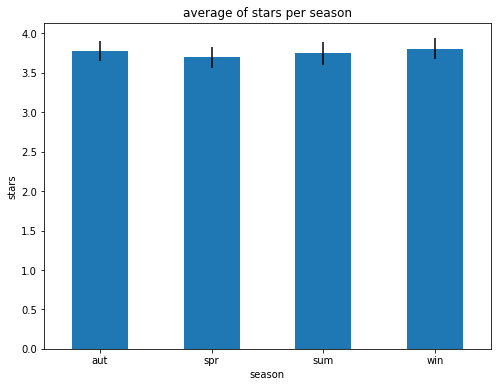

In [74]:
df_dates.groupby(by = 'period')["stars_y"].mean().plot(
    kind='bar', rot=0, figsize=(8,6), yerr = lengths_CI)
plt.ylabel('stars')
plt.xlabel('season')
plt.title('average of stars per season')
plt.show()

The highest reviews are in summer, from the confidence intervals it doesn't seem statistically relevant. Let us try with t-test

In [79]:
def difference_means_seasons(seasons):
    season1 = df_dates.groupby(by='period')["stars_y"].get_group(seasons[0]).values
    season2 = df_dates.groupby(by='period')["stars_y"].get_group(seasons[1]).values
    print('the result of the T-test for the seasons', seasons, 'is')
    print(scipy.stats.ttest_ind(season1, season2))

In [80]:
seasons =['sum', 'aut', 'spr', 'win']

In [81]:
for i in range(4):
    for j in range(i,4):
        difference_means_seasons([seasons[i], seasons[j]])

the result of the T-test for the seasons ['sum', 'sum'] is
Ttest_indResult(statistic=0.0, pvalue=1.0)
the result of the T-test for the seasons ['sum', 'aut'] is
Ttest_indResult(statistic=-0.4797056615403512, pvalue=0.6314700059330572)
the result of the T-test for the seasons ['sum', 'spr'] is
Ttest_indResult(statistic=1.0447848189134468, pvalue=0.2962033717391738)
the result of the T-test for the seasons ['sum', 'win'] is
Ttest_indResult(statistic=-1.1628868720928374, pvalue=0.24496192643880194)
the result of the T-test for the seasons ['aut', 'aut'] is
Ttest_indResult(statistic=0.0, pvalue=1.0)
the result of the T-test for the seasons ['aut', 'spr'] is
Ttest_indResult(statistic=1.4970612518385515, pvalue=0.134482588590645)
the result of the T-test for the seasons ['aut', 'win'] is
Ttest_indResult(statistic=-0.6672236114068598, pvalue=0.504679214025781)
the result of the T-test for the seasons ['spr', 'spr'] is
Ttest_indResult(statistic=0.0, pvalue=1.0)
the result of the T-test for the

The difference in mean is significant for the seasons spring-winter

### Can these differences be generalized for the totality of the reviews or are these differences specific for reviews of restaurants ?

In [82]:
reviews = pd.read_pickle('reviews')

In [86]:
reviews = reviews.sample(6209)

In [87]:
reviews

,review_id,user_id,business_id,stars,useful,funny,cool,text,date
482549,g_RWk4T-y5r1S7wZDQPWDA,FOpNmeo0O-2XrOCSeOpRAA,RGITbQOvmiSuUIAWm9abKA,3,4,1,2,Edited (After I tried Viet food in Chicago)\n\...,2015-12-07 07:44:10
246526,KFndpbXIsl699xDn3AVGKQ,Ntlx22ONXLFCm_txyyiqHA,xV1SqyGctkXcxlU9MI9vTw,2,0,0,0,This neighborhood swill house earns its two st...,2010-10-14 20:43:34
40649,U4m24V08PIvwp3uJpIsZ9w,RtGqdDBvvBCjcu5dUqwfzA,6mu04eyRBGj1AQh3Smoe4w,5,0,0,0,I was walking inside Excel Plaza for another b...,2017-07-31 20:22:27
124761,UMvOz5TpRpvgunVgCW4FrA,31KMMUIMOesOqeS2SyQtvg,h8h3fdkk7cm_MSIYV-tPEA,5,0,0,0,Dr.Kari is extremely knowledgable and competen...,2016-06-16 00:39:11
457742,E-RJncqH-69-cSdIR9Z-tg,YUlx_PoMfyS_3KuQmwdOmw,3942kJZKI8gsJO0BdRsneA,5,1,0,0,My first trip here was deeeeelish!\n\nI knew I...,2011-01-31 08:04:07
...,...,...,...,...,...,...,...,...,...
68125,VTz3dU5jrmzyMsIwKs2A7w,VTuQH3ShO1CK0IBzBdtZgA,dniQomQgXyJwkCYdwLhtPA,5,5,0,1,We are so happy and lucky that Lovejoy's has e...,2019-03-13 02:51:21
279754,PEwVgLYDoK3_aK6LOfWA-Q,YO7RW77ANgi6H-dlpPX51w,28RuK9yoG0k0LLGM7fqKQQ,3,3,0,1,I came here for the dim sum so my review is ju...,2019-10-12 01:39:53
337260,_279Yr4nNSp54-eP_QuQrA,Fw2zXzybKYPxDqS0pcssPA,NJsT9kBEOW3uyPcvmZrfJA,5,0,0,0,"So so good As I was eating, I was literally t...",2019-06-18 02:12:31
434317,9Yk3d9wOsPZ8eyXUIMp0oQ,wZDZHlOPtYnx2tM8e62ytg,Ta8uE9iSgqekzQOnV-L_HA,5,1,0,1,BEST TEEN PROGRAMS IN ALL OF AUSTIN (and guess...,2015-04-10 02:29:34


Now we have a sample (with the same number of elements) of reviews not necessarly about restaurants.

In [97]:
reviews = reviews.drop(columns=['user_id', 'useful', 'funny', 'cool', 'text', 'business_id', 'review_id'])

In [98]:
reviews

,stars,date
482549,3,2015-12-07 07:44:10
246526,2,2010-10-14 20:43:34
40649,5,2017-07-31 20:22:27
124761,5,2016-06-16 00:39:11
457742,5,2011-01-31 08:04:07
...,...,...
68125,5,2019-03-13 02:51:21
279754,3,2019-10-12 01:39:53
337260,5,2019-06-18 02:12:31
434317,5,2015-04-10 02:29:34


In [ ]:
reviews.date = reviews['date'].apply(lambda x : datetime.strptime(x, '%Y-%m-%d %H:%M:%S'))

In [103]:
reviews

,stars,date
482549,3,2015-12-07 07:44:10
246526,2,2010-10-14 20:43:34
40649,5,2017-07-31 20:22:27
124761,5,2016-06-16 00:39:11
457742,5,2011-01-31 08:04:07
...,...,...
68125,5,2019-03-13 02:51:21
279754,3,2019-10-12 01:39:53
337260,5,2019-06-18 02:12:31
434317,5,2015-04-10 02:29:34


In [105]:
lengths = []
for i in range(2005, 2022):
    data = reviews.groupby(reviews['date'].dt.year)["stars"].get_group(i).values
    lengths.append(bootstrap_CI(data, 1000)[1]-bootstrap_CI(data, 1000)[0])
print(lengths)

[1.0, 1.046590909090909, 0.6300925925925922, 0.4247641509433957, 0.3742690058479532, 0.30904471544715406, 0.2970297029702973, 0.31825757575757585, 0.2404392764857879, 0.23947124304267176, 0.23932926829268286, 0.22015306122448974, 0.21992350486787204, 0.22091503267973867, 0.22859973579920734, 0.2940393518518518, 0.9285714285714284]


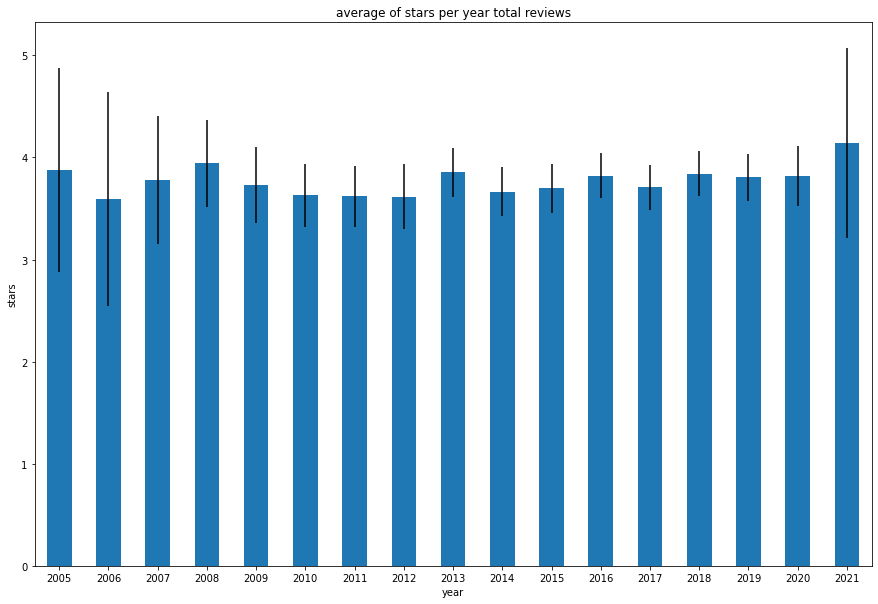

In [107]:
reviews.groupby(reviews['date'].dt.year)["stars"].mean().plot(
    kind='bar', rot=0, figsize=(15,10), yerr = lengths)
plt.ylabel('stars')
plt.xlabel('year')
plt.title('average of stars per year total reviews')
plt.show()

In [110]:
def difference_means_years(years):
    year1 = reviews.groupby(reviews['date'].dt.year)["stars"].get_group(years[0]).values
    year2 = reviews.groupby(reviews['date'].dt.year)["stars"].get_group(years[1]).values
    print('the result of the T-test for the years', years, 'is')
    print(scipy.stats.ttest_ind(year1, year2))

In [111]:
for i in range(2005,2019):
    for j in range(i,2019):
        difference_means_years([i,j])

the result of the T-test for the years [2005, 2005] is
Ttest_indResult(statistic=0.0, pvalue=1.0)
the result of the T-test for the years [2005, 2006] is
Ttest_indResult(statistic=0.6052275326688026, pvalue=0.5499021631612294)
the result of the T-test for the years [2005, 2007] is
Ttest_indResult(statistic=0.22196139792785607, pvalue=0.8250977007163238)
the result of the T-test for the years [2005, 2008] is
Ttest_indResult(statistic=-0.17279156519263153, pvalue=0.8631271401445191)
the result of the T-test for the years [2005, 2009] is
Ttest_indResult(statistic=0.330703652523764, pvalue=0.7412594861255095)
the result of the T-test for the years [2005, 2010] is
Ttest_indResult(statistic=0.5594468296430963, pvalue=0.5763536881063795)
the result of the T-test for the years [2005, 2011] is
Ttest_indResult(statistic=0.5374391531112451, pvalue=0.5913511194502721)
the result of the T-test for the years [2005, 2012] is
Ttest_indResult(statistic=0.5299306293207053, pvalue=0.5965100249943187)
the 

the result of the T-test for the years [2012, 2014] is
Ttest_indResult(statistic=-0.4742643455086436, pvalue=0.6354308324755416)
the result of the T-test for the years [2012, 2015] is
Ttest_indResult(statistic=-0.8198300077635987, pvalue=0.4125115547748647)
the result of the T-test for the years [2012, 2016] is
Ttest_indResult(statistic=-2.140834102895704, pvalue=0.032525350432314304)
the result of the T-test for the years [2012, 2017] is
Ttest_indResult(statistic=-0.9276416108287301, pvalue=0.3538072969425664)
the result of the T-test for the years [2012, 2018] is
Ttest_indResult(statistic=-2.342321211615055, pvalue=0.019342940482548206)
the result of the T-test for the years [2013, 2013] is
Ttest_indResult(statistic=0.0, pvalue=1.0)
the result of the T-test for the years [2013, 2014] is
Ttest_indResult(statistic=2.0802908432437497, pvalue=0.03777394231838487)
the result of the T-test for the years [2013, 2015] is
Ttest_indResult(statistic=1.7057155790095, pvalue=0.08835935071042969)


In this case the significative differences in means for a significance level of 0.05 are:
2008-2010, 2008-2011, 2008-2012, 2010-2018, 2011-2013, 2011-2016, 2011-2018, 2012-2013, 2012-2016, 2012-2018, 2013-2014

To simplify we have that the years with smallest"significant" means are 2011-2012 while 2018-2016 are the one with highest mean therefore the results do not match the previous ones. It could be that the results are biased or maybe it is also because there is some incertainty and noise in the data.

In [112]:
lengths = []
for i in range(1, 13):
    data = reviews.groupby(reviews['date'].dt.month)["stars"].get_group(i).values
    lengths.append(bootstrap_CI(data, 1000)[1]-bootstrap_CI(data, 1000)[0])
print(lengths)

[0.23149293286219086, 0.25450901803607184, 0.23909362549800806, 0.23504854368932016, 0.2677820267686424, 0.2412149532710277, 0.2201051779935277, 0.23754464285714327, 0.24715250965250934, 0.27099322799097036, 0.26121651785714306, 0.26561203319502047]


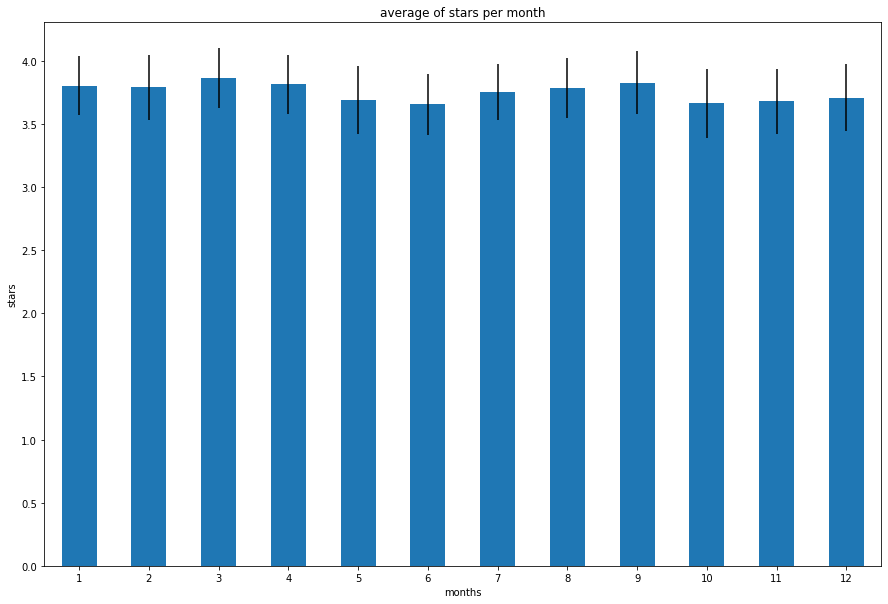

In [113]:
reviews.groupby(reviews['date'].dt.month)["stars"].mean().plot(
    kind='bar', rot=0, figsize=(15,10), yerr = lengths)
plt.ylabel('stars')
plt.xlabel('months')
plt.title('average of stars per month')
plt.show()

In [114]:
def difference_means_months(months):
    month1 = reviews.groupby(reviews['date'].dt.month)["stars"].get_group(months[0]).values
    month2 = reviews.groupby(reviews['date'].dt.month)["stars"].get_group(months[1]).values
    print('the result of the T-test for the months', months, 'is')
    print(scipy.stats.ttest_ind(month1, month2))

In [115]:
for i in range(1,13):
    for j in range(i,13):
        difference_means_months([i,j])

the result of the T-test for the months [1, 1] is
Ttest_indResult(statistic=0.0, pvalue=1.0)
the result of the T-test for the months [1, 2] is
Ttest_indResult(statistic=0.16344871715872178, pvalue=0.8701962166811292)
the result of the T-test for the months [1, 3] is
Ttest_indResult(statistic=-0.6767845121617747, pvalue=0.4986895128812371)
the result of the T-test for the months [1, 4] is
Ttest_indResult(statistic=-0.1349041672796438, pvalue=0.8927128048451203)
the result of the T-test for the months [1, 5] is
Ttest_indResult(statistic=1.3115613007123947, pvalue=0.1899451463649275)
the result of the T-test for the months [1, 6] is
Ttest_indResult(statistic=1.6977253875163307, pvalue=0.0898427054950049)
the result of the T-test for the months [1, 7] is
Ttest_indResult(statistic=0.5820087527134454, pvalue=0.560671771650225)
the result of the T-test for the months [1, 8] is
Ttest_indResult(statistic=0.2528066502053047, pvalue=0.8004638536778238)
the result of the T-test for the months [1, 

In this case the relevant differences in mean are:
3-11 (march, november)
3-10 (march, october)
3-6 (march june)

In some way march is the month with the highest significant mean this result does not confirm the trend for the restaurant reviews. 

In [116]:
column_to_add = []
for el in reviews['date'].dt.month:
    if el in summer:
        column_to_add.append('sum')
    if el in autumn:
        column_to_add.append('aut')
    if el in spring:
        column_to_add.append('spr')
    if el in winter:
        column_to_add.append('win')
reviews['period']=column_to_add

In [117]:
reviews

,stars,date,period
482549,3,2015-12-07 07:44:10,win
246526,2,2010-10-14 20:43:34,aut
40649,5,2017-07-31 20:22:27,sum
124761,5,2016-06-16 00:39:11,sum
457742,5,2011-01-31 08:04:07,win
...,...,...,...
68125,5,2019-03-13 02:51:21,spr
279754,3,2019-10-12 01:39:53,aut
337260,5,2019-06-18 02:12:31,sum
434317,5,2015-04-10 02:29:34,spr


In [ ]:
lengths_CI = []
seasons = ['sum','aut', 'spr', 'win']
for season in seasons:
    data = df_dates.groupby(by='period')["stars_y"].get_group(season).values
    lengths_CI.append(bootstrap_CI(data, 1000)[1]-bootstrap_CI(data, 1000)[0])
print(lengths_CI)